# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Set Pulse

Text(0.5, 1.0, 'Pulses over time')

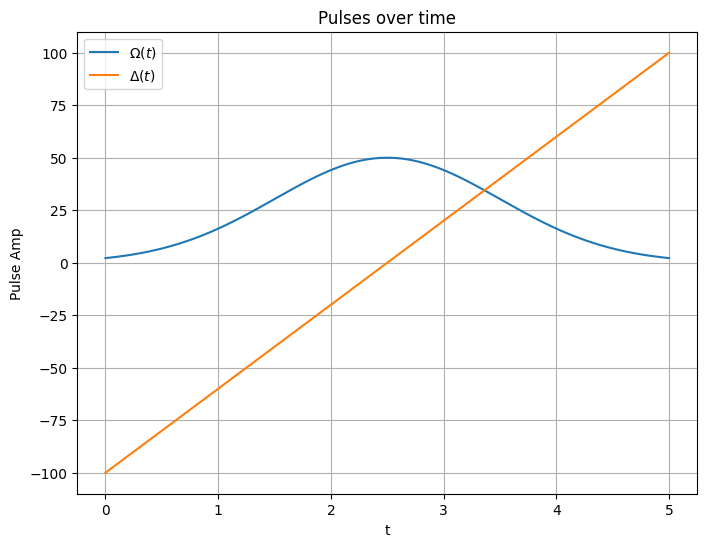

In [4]:
# defining time dependant coefs
T = 5
t = np.linspace(0, T, 1000)
sigma = 1
omega_max = 50
omega_t = omega_max * np.exp(-0.5 * ((t - T/2) / sigma) ** 2)
delta_t = 2*omega_max*(t / (T/2) - 1)

# Plot the wave
plt.figure(figsize=(8, 6))
plt.plot(t, omega_t, label=r'$\Omega(t)$')
plt.plot(t, delta_t, label=r'$\Delta(t)$')
plt.xlabel("t")
plt.ylabel("Pulse Amp")
plt.grid(True)
plt.legend()
plt.title("Pulses over time")


# Defining Stabilizers for 4-qubit code

In [7]:
I = qeye(2)
X = sigmax()
Y = sigmay()
Z = sigmaz()

# Define the stabilizer generators for the 5-qubit bit-flip code
g1 = tensor(X, X, X, X)
g2 = tensor(Z, Z, Z, Z)
g3 = tensor(X, Y, Z, I)

stabilizers = [
    g1,
    g2,
    g3
]

X_L = tensor(Y, I, Y, I)
Z_L = tensor(Z, Z, I, I)
Y_L = -tensor(I, X, X, I)


In [9]:
basis_states = [basis(2, 0), basis(2, 1)]

# Define the logical zero state |0_L>
logical_zero = (tensor(basis_states[0], basis_states[0], basis_states[0], basis_states[0]) +
                1j*tensor(basis_states[0], basis_states[0], basis_states[1], basis_states[1]) +
                1j*tensor(basis_states[1], basis_states[1], basis_states[0], basis_states[0]) +
                tensor(basis_states[1], basis_states[1], basis_states[1], basis_states[1])).unit()

logical_one = X_L * logical_zero

# Applying error
# error = tensor(I, X, I, X)
# logical_zero = error * logical_zero
# logical_one = error * logical_one

# Define projection operators
P0 = logical_zero * logical_zero.dag()
P1 = logical_one * logical_one.dag()
P_tot = P0 + P1

-300 0.0 1.0
-300 1.0 0.0
-100 0.0 0.0
-100 0.0 0.0
-100 0.0 0.0
-100 0.0 0.0
-100 0.0 0.0
-100 0.0 0.0
100 0.0 0.0
100 0.0 0.0
100 0.0 0.0
100 0.0 0.0
100 0.0 0.0
100 0.0 0.0
300 0.0 0.0
300 0.0 0.0
{-300: 2, -100: 6, 100: 6, 300: 2}


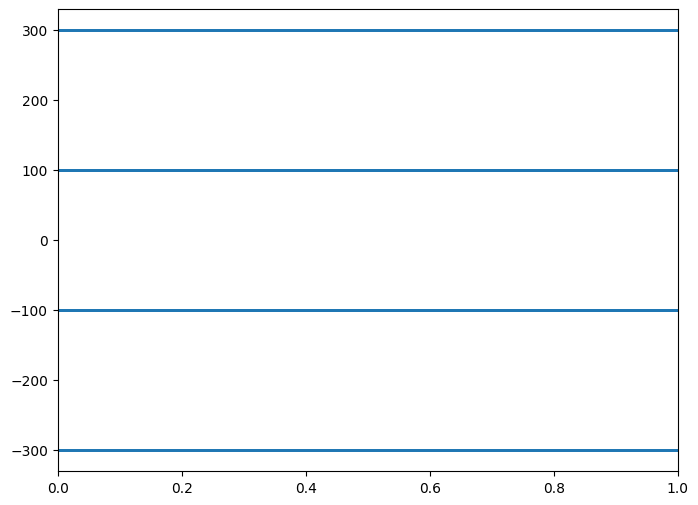

In [53]:
Ep = 100
Hp = -Ep*(g1 + g2 + g3)

eigenvalues, eigenstates = Hp.eigenstates()

energies = {}
colors = [
    'red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan',
    'magenta', 'yellow', 'lime', 'teal', 'gold', 'navy'
]

plt.figure(figsize=(8, 6))

# Loop through both arrays
for energy, state in zip(eigenvalues, eigenstates):
    energy = int(np.round(energy, 1))
    
    if energy not in energies.keys():
        energies[energy] = 1
    else:
        energies[energy] += 1    
    plt.axhline(y = energy, linestyle = '-', linewidth = 2)
    
    proj_zero = np.abs(logical_zero.overlap(state))**2
    proj_one = np.abs(logical_one.overlap(state))**2

    print(energy, np.round(proj_zero), np.round(proj_one))
print(energies)

In [68]:
for i, t_step in enumerate(t):
    H_S = omega_t[i] * X_L + delta_t[i] * Z_L + Hp
    eigenvalues, eigenstates = H_S.eigenstates()
    
    for energy, state in zip(eigenvalues, eigenstates):        
        proj_zero = np.abs(logical_zero.overlap(state))**2
        proj_one = np.abs(logical_one.overlap(state))**2
        print(energy, np.round(proj_zero), np.round(proj_one))
    print()

-400.0241277659569 1.0 0.0
-200.0241277659582 0.0 0.0
-200.02412776595725 0.0 0.0
-200.02412776595645 0.0 0.0
-199.9758722340425 0.0 1.0
-0.02412776595789425 0.0 0.0
-0.024127765957231297 0.0 0.0
-0.024127765956885615 0.0 0.0
0.02412776595764199 0.0 0.0
0.024127765957753206 0.0 0.0
0.024127765958088732 0.0 0.0
199.97587223404332 0.0 0.0
200.0241277659571 0.0 0.0
200.0241277659573 0.0 0.0
200.02412776595764 0.0 0.0
400.02412776595753 0.0 0.0

-399.8245879004488 1.0 0.0
-200.1754120995504 0.0 1.0
-199.8245879004506 0.0 0.0
-199.82458790044927 0.0 0.0
-199.8245879004485 0.0 0.0
-0.17541209955040035 0.0 0.0
-0.1754120995503087 0.0 0.0
-0.17541209954992942 0.0 0.0
0.17541209955014977 0.0 0.0
0.17541209955081447 0.0 0.0
0.17541209955112358 0.0 0.0
199.82458790044927 0.0 0.0
199.82458790044933 0.0 0.0
199.82458790044973 0.0 0.0
200.175412099551 0.0 0.0
399.82458790044956 0.0 0.0

-399.6250649312535 1.0 0.0
-200.37493506874614 0.0 1.0
-199.62506493125412 0.0 0.0
-199.6250649312536 0.0 0.0
-199